In [ ]:
%cd /content

/content


In [ ]:
import pandas as pd
import numpy as np
mobile_price=pd.read_csv("train.csv")

In [ ]:
x=mobile_price.iloc[:,0:20]
y=mobile_price.iloc[:,20]
accuracies = dict()

In [ ]:
r = np.corrcoef(x.iloc[:,19], y)
r

array([[1.        , 0.01878481],
       [0.01878481, 1.        ]])

In [ ]:
x = x[['m_dep', 'sc_w', 'pc','talk_time','int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power','ram']]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Logistic Regression

In [ ]:
clf = LogisticRegression(multi_class='ovr',tol=0.1,solver='sag')
clf.fit(x_train, y_train)


LogisticRegression(multi_class='ovr', solver='sag', tol=0.1)

In [ ]:
y_test_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
accuracies["logistic regression"]=accuracy_score(y_test_pred,y_test)
print(f'Test score {accuracies["logistic regression"]}')

Train score 0.85
Test score 0.8575


In [ ]:
from sklearn.metrics import confusion_matrix
cf_logistic=confusion_matrix(y_test, y_test_pred)
cf_logistic

array([[ 95,   1,   0,   0],
       [  5,  83,  15,   0],
       [  0,  23,  62,  12],
       [  0,   0,   1, 103]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))
from sklearn.metrics import precision_score
print("Precision ",precision_score(y_test,y_test_pred,average='micro'))
from sklearn.metrics import recall_score
print("Recall ",recall_score(y_test,y_test_pred,average='micro'))

              precision    recall  f1-score   support

           0      0.950     0.990     0.969        96
           1      0.776     0.806     0.790       103
           2      0.795     0.639     0.709        97
           3      0.896     0.990     0.941       104

    accuracy                          0.858       400
   macro avg      0.854     0.856     0.852       400
weighted avg      0.853     0.858     0.853       400

Precision  0.8575
Recall  0.8575


By SVM

In [ ]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
y_test_pred=model_svm.predict(x_test)
y_train_pred=model_svm.predict(x_train)
from sklearn.metrics import accuracy_score
accuracies["SVM"]=accuracy_score(y_test_pred,y_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracies["SVM"]}')

Train score 0.97375
Test score 0.945


In [ ]:
cf_svm=confusion_matrix(y_test, y_test_pred)
cf_svm

array([[94,  2,  0,  0],
       [ 7, 94,  2,  0],
       [ 0,  3, 93,  1],
       [ 0,  0,  7, 97]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))
from sklearn.metrics import precision_score
print("Precision ",precision_score(y_test,y_test_pred,average='micro'))
from sklearn.metrics import recall_score
print("Recall ",recall_score(y_test,y_test_pred,average='micro'))

              precision    recall  f1-score   support

           0      0.931     0.979     0.954        96
           1      0.949     0.913     0.931       103
           2      0.912     0.959     0.935        97
           3      0.990     0.933     0.960       104

    accuracy                          0.945       400
   macro avg      0.945     0.946     0.945       400
weighted avg      0.946     0.945     0.945       400

Precision  0.945
Recall  0.945


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
learner=RandomForestClassifier(n_estimators=10,random_state=0)
learner.fit(x_train,y_train)
y_train_pred=learner.predict(x_train)

In [ ]:
y_test_pred=learner.predict(x_test)
from sklearn.metrics import accuracy_score

In [ ]:
accuracies["Random Forest"]=accuracy_score(y_test_pred,y_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracies["Random Forest"]}')


Train score 0.996875
Test score 0.895


In [ ]:
cf_rf=confusion_matrix(y_test, y_test_pred)
cf_rf

array([[92,  4,  0,  0],
       [15, 86,  2,  0],
       [ 0,  7, 86,  4],
       [ 0,  0, 10, 94]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))
from sklearn.metrics import precision_score
print("Precision ",precision_score(y_test,y_test_pred,average='micro'))
from sklearn.metrics import recall_score
print("Recall ",recall_score(y_test,y_test_pred,average='micro'))

              precision    recall  f1-score   support

           0      0.860     0.958     0.906        96
           1      0.887     0.835     0.860       103
           2      0.878     0.887     0.882        97
           3      0.959     0.904     0.931       104

    accuracy                          0.895       400
   macro avg      0.896     0.896     0.895       400
weighted avg      0.897     0.895     0.895       400

Precision  0.895
Recall  0.895


Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)
y_train_pred=gnb.predict(x_train)
y_test_pred=gnb.predict(x_test)
accuracies["Naive bayes"]=accuracy_score(y_test_pred,y_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracies["Naive bayes"]}')

Train score 0.79875
Test score 0.83


In [ ]:
cf_nb=confusion_matrix(y_test, y_test_pred)
cf_nb

array([[90,  6,  0,  0],
       [ 8, 81, 14,  0],
       [ 0, 17, 69, 11],
       [ 0,  0, 12, 92]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))
from sklearn.metrics import precision_score
print("Precision ",precision_score(y_test,y_test_pred,average='micro'))
from sklearn.metrics import recall_score
print("Recall ",recall_score(y_test,y_test_pred,average='micro'))

              precision    recall  f1-score   support

           0      0.918     0.938     0.928        96
           1      0.779     0.786     0.783       103
           2      0.726     0.711     0.719        97
           3      0.893     0.885     0.889       104

    accuracy                          0.830       400
   macro avg      0.829     0.830     0.830       400
weighted avg      0.829     0.830     0.830       400

Precision  0.83
Recall  0.83


Neural network

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y_train = ohot.fit_transform(y_train)
y_test=ohot.fit_transform(y_test)

In [ ]:
y_train=y_train.toarray()
y_test=y_test.toarray()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=105,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/105
25/25 [==============================] - 1s 9ms/step - loss: 1.3747 - accuracy: 0.3256 - val_loss: 1.3569 - val_accuracy: 0.3725
Epoch 2/105
25/25 [==============================] - 0s 2ms/step - loss: 1.3442 - accuracy: 0.3756 - val_loss: 1.3275 - val_accuracy: 0.4050
Epoch 3/105
25/25 [==============================] - 0s 3ms/step - loss: 1.3157 - accuracy: 0.4019 - val_loss: 1.2981 - val_accuracy: 0.4400
Epoch 4/105
25/25 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.4275 - val_loss: 1.2642 - val_accuracy: 0.4450
Epoch 5/105
25/25 [==============================] - 0s 3ms/step - loss: 1.2475 - accuracy: 0.4631 - val_loss: 1.2273 - val_accuracy: 0.4775
Epoch 6/105
25/25 [==============================] - 0s 3ms/step - loss: 1.2068 - accuracy: 0.4981 - val_loss: 1.1851 - val_accuracy: 0.4950
Epoch 7/105
25/25 [==============================] - 0s 3ms/step - loss: 1.1613 - accuracy: 0.5200 - val_loss: 1.1381 - val_accuracy: 0.5425
Epoch 8/105
2

In [ ]:
results = model.evaluate(x_test,y_test)
accuracies["Neural network"]=results[1]
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

13/13 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9575
Final test set loss: 0.102085
Final test set accuracy: 0.957500


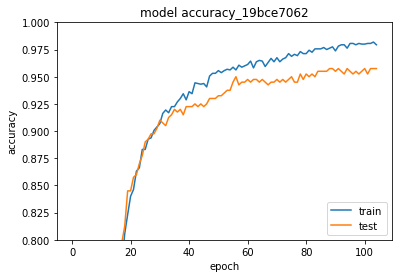

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.8,1)
plt.legend(['train', 'test'], loc='lower right')
plt.show()


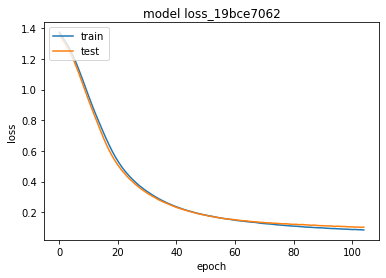

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

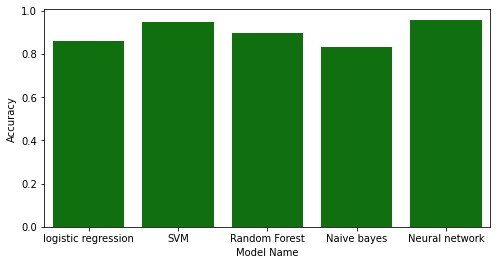

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy']) 
accuracy_df
f, ax = plt.subplots(figsize=(8,4))
sns.set_color_codes("dark")
sns.barplot(y="Accuracy", x="Model Name", data = accuracy_df, color="green")
plt.show()